In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npfrom 
from sklearn import metrics

In [73]:
feature_collection = pd.read_csv('feature_collection.csv', index_col='book_id')

In [74]:
 feature_collection = feature_collection.dropna()

In [75]:
from corpus import load_corpus, save_corpus
corpus = load_corpus()
corpus = corpus.astype({
  'Book_Name': 'string',
  'guten_genre': 'category',
  'Author_Name': 'string',
  'content': 'string'
})
corpus.dropna(inplace=True)
corpus

could not load corpus.csv. Will create corpus from html files.


,Book_Name,guten_genre,Author_Name,content
book_id,,,,
pg10067,The Mystery of the Boule Cabinet: A Detective ...,Detective and Mystery,Stevenson| Burton Egbert,"A Detective Story A.B.M. Fellow-Sherlockian ""H..."
pg1032,The Pupil,Literary,James| Henry,This edition first published 1916 The text fol...
pg10379,At Love's Cost,Literary,Garvice| Charles,"""Until this moment I have never fully realised..."
pg10473,The Heart of the Range,Western Stories,White| William Patterson,"""The Rider of Golden Bar,"" ""Hidden Trails,"" ""L..."
pg10812,The Worshipper of the Image,Literary,Gallienne| Richard Le,The Worshipper of the Image Evening was in the...
...,...,...,...,...
pg766DickensDavidCopfld,David Copperfield,Literary,Dickens| Charles,I do not find it easy to get sufficiently far ...
pg786DickensHardTimes,Hard Times,Literary,Dickens| Charles,The One Thing Needful Murdering the Innocents ...
pg834DoyleMemoirsSherlk,Memoirs of Shelock Holmes,Detective and Mystery,Connan| Doyle,"""I am afraid, Watson, that I shall have to go,..."


In [76]:
feature_collection['genre'] = corpus['guten_genre']

In [77]:
feature_collection.columns

Index(['title_word_count', 'title_avg_word_length', '._count', '!_count',
       '?_count', ',_count', '``_count', 'length', 'proper_names',
       'pos_sentiment', 'neu_sentiment', 'neg_sentiment', 'point_of_view',
       'genre'],
      dtype='object')

In [78]:
di = {'Allegories' : 0, 'Christmas Stories' :1, 'Detective and Mystery' :2,
                 'Ghost and Horror':3,'Humorous and Wit and Satire' :4,
                 'Literary' :5,'Love and Romance' :6,'Sea and Adventure' :7,
                 'Western Stories' :8}

In [79]:
df = feature_collection.replace({'genre': di})

In [80]:
#df[['title_word_count', 'length', 'genre']] = df[['title_word_count', 'length', 'genre']].astype(float)

In [81]:
X = df[['title_word_count', 'title_avg_word_length', '._count', '!_count',
       '?_count', ',_count', '``_count', 'length', 'proper_names',
       'pos_sentiment', 'neu_sentiment', 'neg_sentiment', 'point_of_view']]

y = df['genre']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, stratify=y)

In [87]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [88]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       0.98      0.79      0.88       327
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.78       331
   macro avg       0.11      0.09      0.10       331
weighted avg       0.97      0.78      0.87       331



C:\Users\Rob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7824773413897281


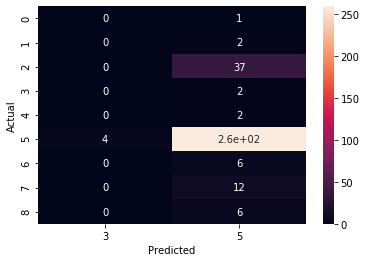

In [89]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(metrics.accuracy_score(y_test, y_pred))
plt.show()

In [90]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [91]:
gnb = GaussianNB()

y_pred_r = gnb.fit(X_resampled, y_resampled).predict(X_test)

In [92]:
print(classification_report(y_pred_r, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.12      0.21        17
           2       0.49      0.17      0.25       106
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        64
           5       0.02      1.00      0.03         4
           6       0.17      0.02      0.03        57
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1

    accuracy                           0.08       331
   macro avg       0.19      0.15      0.06       331
weighted avg       0.24      0.08      0.10       331



C:\Users\Rob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0755287009063444


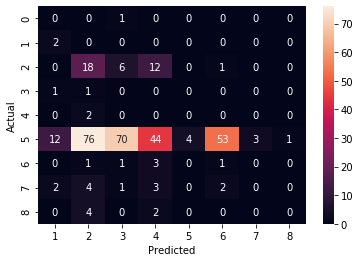

In [94]:
confusion_matrix = pd.crosstab(y_test, y_pred_r, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(metrics.accuracy_score(y_test, y_pred_r))
plt.show()